<a href="https://colab.research.google.com/github/CarmenRemsing/-Diabetes-diagnosis-using-a-decision-tree/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for#

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mragpavank/diabetes")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 13.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mragpavank/diabetes/versions/1


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
# Start the K-Fold CV

import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Initialize model
dt_model = DecisionTreeClassifier(random_state=42)

# Define k-Fold (k=5 or 10 is common)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=kfold, scoring='accuracy')

# Results
print(f"Accuracy per fold: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

Accuracy per fold: [0.74025974 0.73376623 0.71428571 0.74509804 0.7254902 ]
Mean Accuracy: 0.73 (±0.01)


In [ ]:
# Combine K-Fold with Grid search



from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearch with 5-fold CV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,  # Uses k-Fold internally
    scoring='accuracy'
)
grid_search.fit(X, y)

# Best model
best_dt = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best CV Accuracy: 0.75


In [ ]:
# Start training
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Split data into training and testing sets

model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train) # Now, X_train and y_train are defined and can be used

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [ ]:
# Insert the new patient

import numpy as np

patient = np.array([0,300, 80,22,105,64,0.173])
X_test = np.array(X_test)

X_test[9] = patient
y_pred = clf.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print (np.array(y_pred)[9])
print (np.array(y_test)[9])

1
0


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.703125


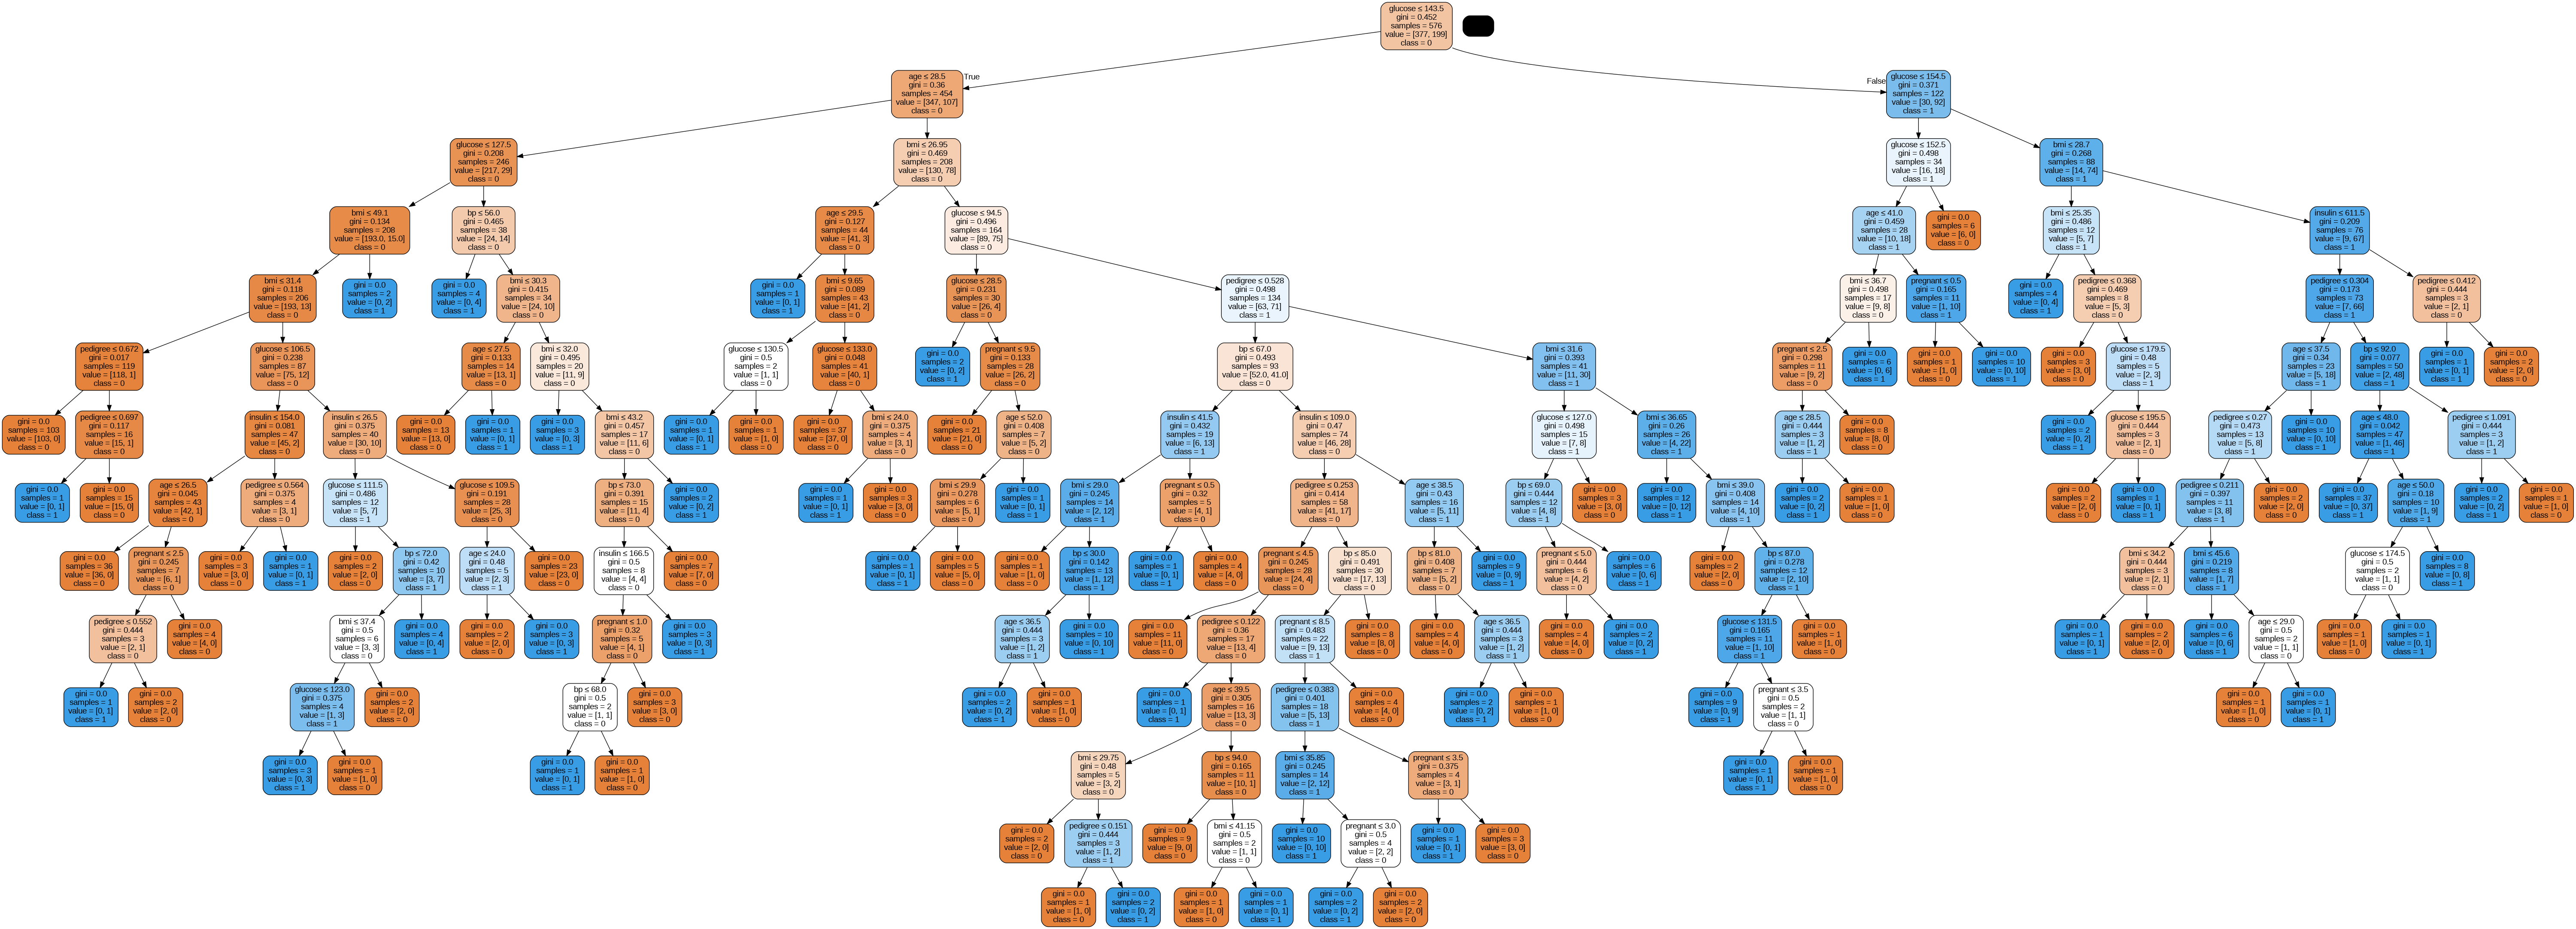

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7239583333333334


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


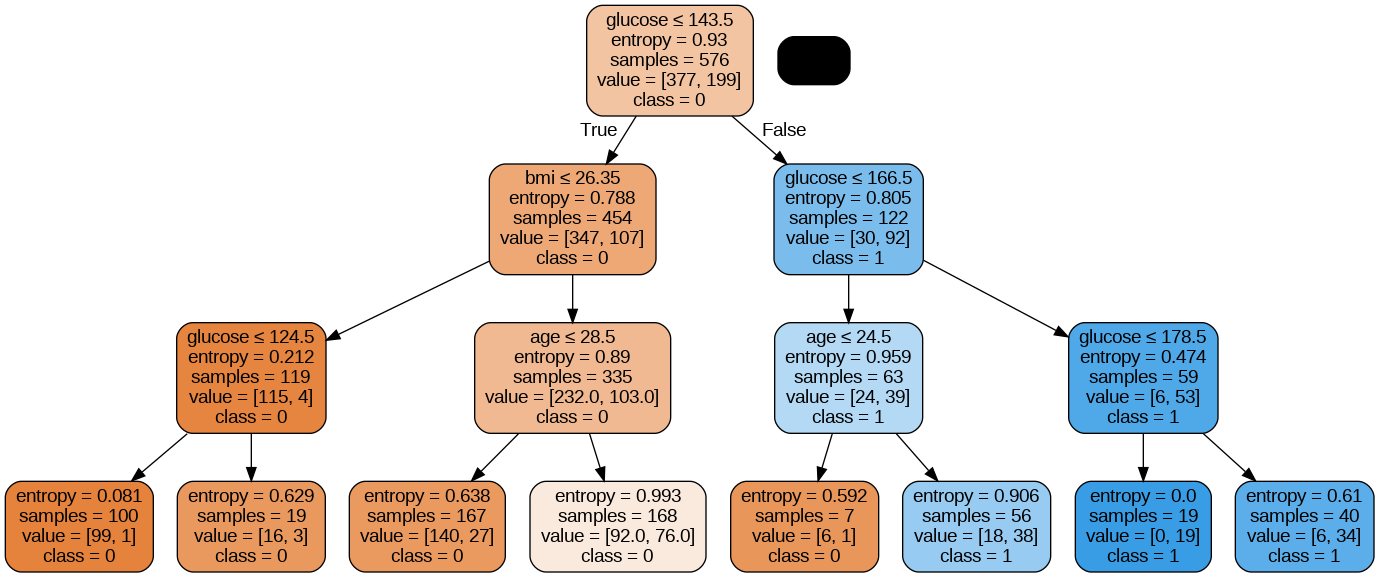

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())